In [253]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from cmath import phase


# Filtro de Primeira Ordem passa-baixa passivo

In [254]:
R = 2700
C = 10e-9 

In [255]:
## Valores medidos

f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
     900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
     30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
     400000, 500000, 600000, 700000, 800000, 900000]

v = [1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02,  
     1,  1,  1,  1,  1,  1, 0.98, 0.92, 0.86, 0.8, 0.74, 0.68, 0.64, 0.6, 0.56, 
     0.32, 0.22, 0.16, 0.128, 0.104, 0.09, 0.08, 0.07, 0.062, 0.0312, 0.0216, 
     0.0112, 0.0088, 0.0056, 0.0048, 0.0024, 0]

teta = -1* np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 5, 5, 6, 7, 8, 17, 23, 31, 36, 
        42, 46, 50, 54, 54, 69, 76, 78, 82, 84, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87])

## 01) Com os valores anotados na Tabela 1, construa o gráfico do módulo do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


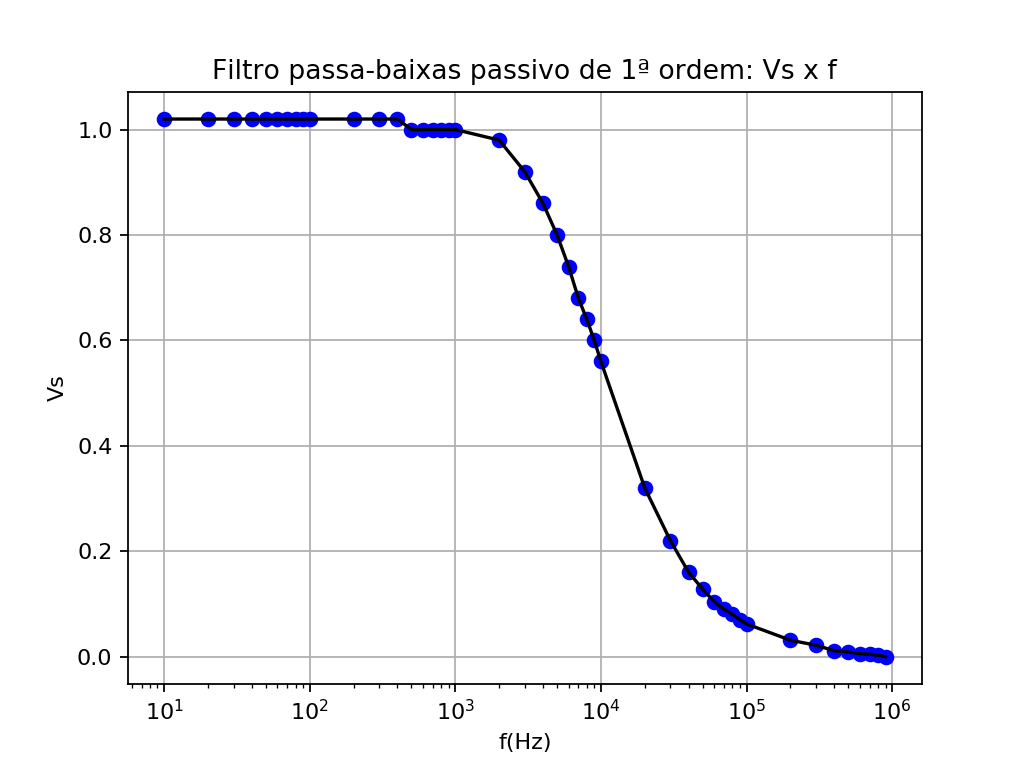

In [256]:
%matplotlib notebook

plt.figure()
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 2) Com os valores anotados na Tabela 2, construa o gráfico do módulo da fase do filtro em função da frequência.

<IPython.core.display.Javascript object>


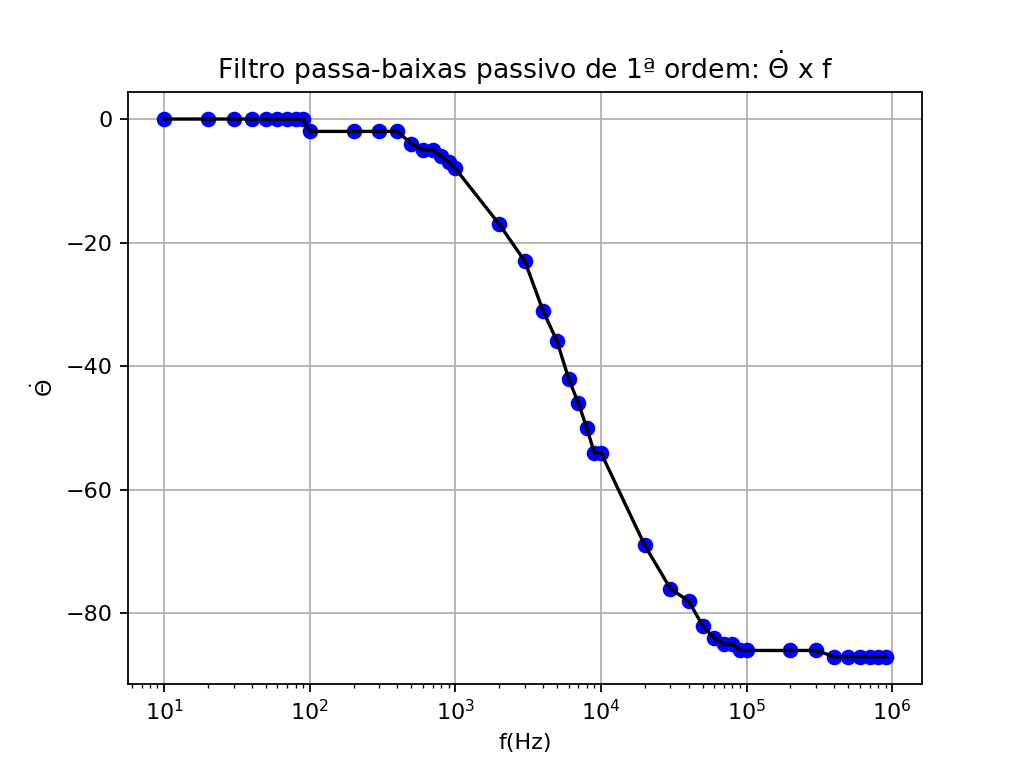

In [115]:
plt.figure()
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")
plt.ylabel('$\dot{\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 3) Calcule a frequência de corte do filtro montado na Parte Prática e indique-a nos gráficos construídos nas questões 1 (a) e 3 (b). 

## a) 

<IPython.core.display.Javascript object>


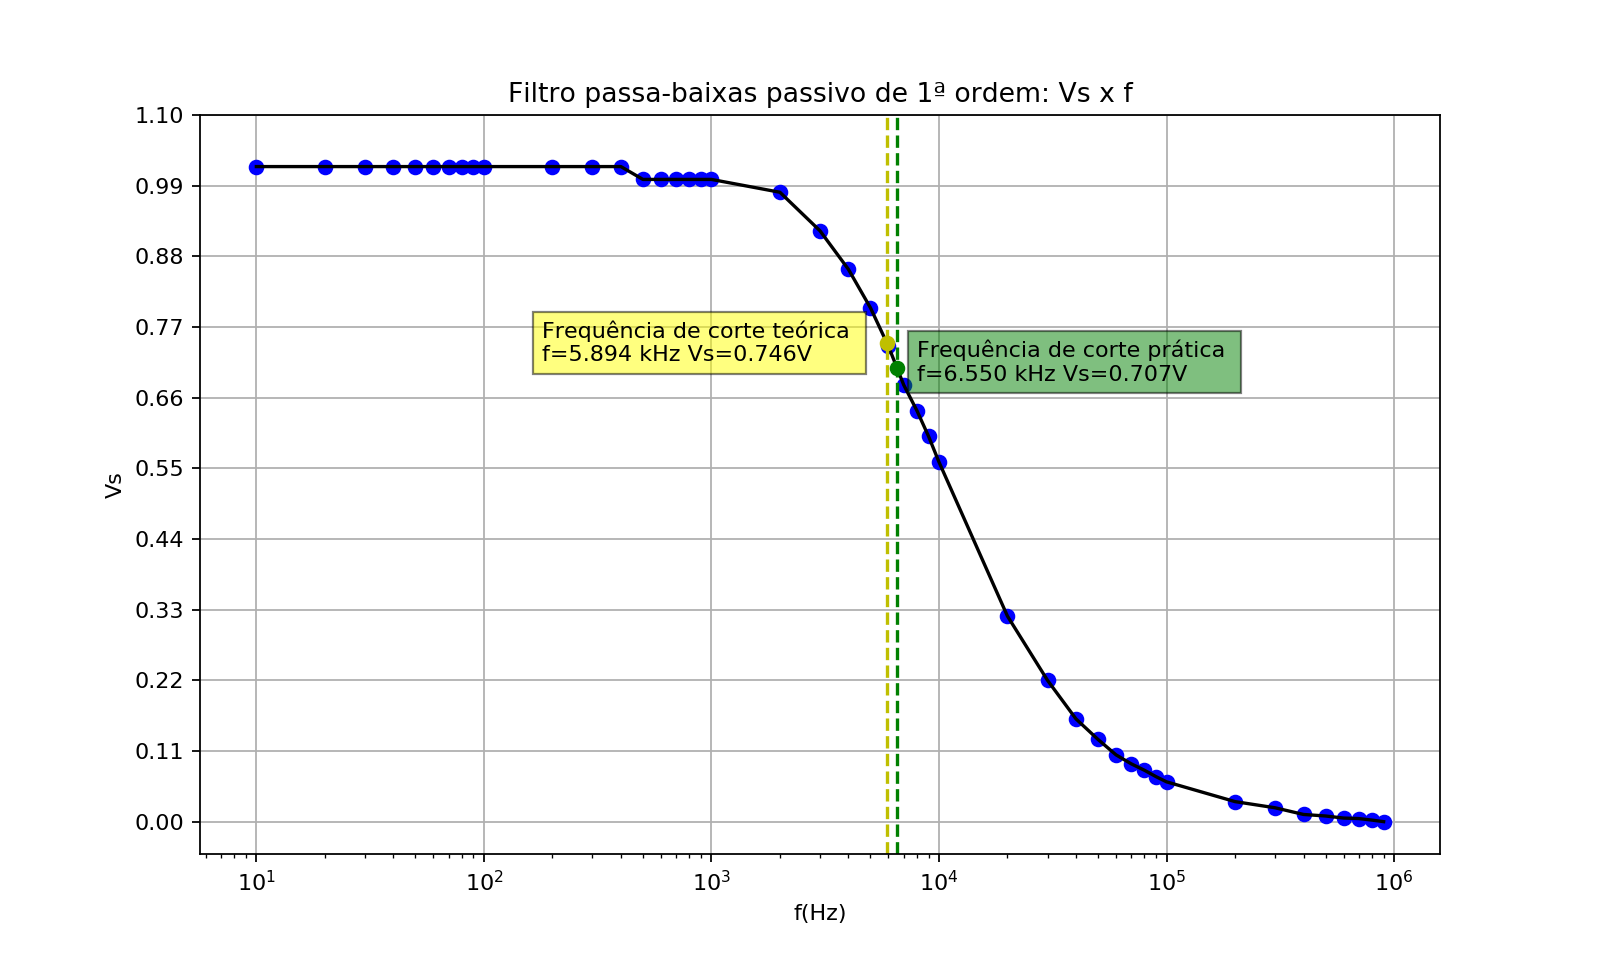

In [257]:
plt.figure(figsize=(10,6))
plt.plot(f, v, 'bo', f, v, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')

plt.plot(5894, 0.746, "oy")
plt.text(180, 0.7163, "Frequência de corte teórica \nf=%.3f kHz Vs=0.746V" %5.894,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=5894, color='y', linestyle='--')

plt.plot(6550, 0.707, "og")
plt.text(8000, 0.6863, "Frequência de corte prática \nf=%.3f kHz Vs=0.707V" %6.550,  bbox=dict(facecolor='green', alpha=0.5))
plt.axvline(x=6550, color='g', linestyle='--')

plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.yticks(np.linspace(0, 1.1, 11))
plt.grid()
plt.show()

## b) 

<IPython.core.display.Javascript object>


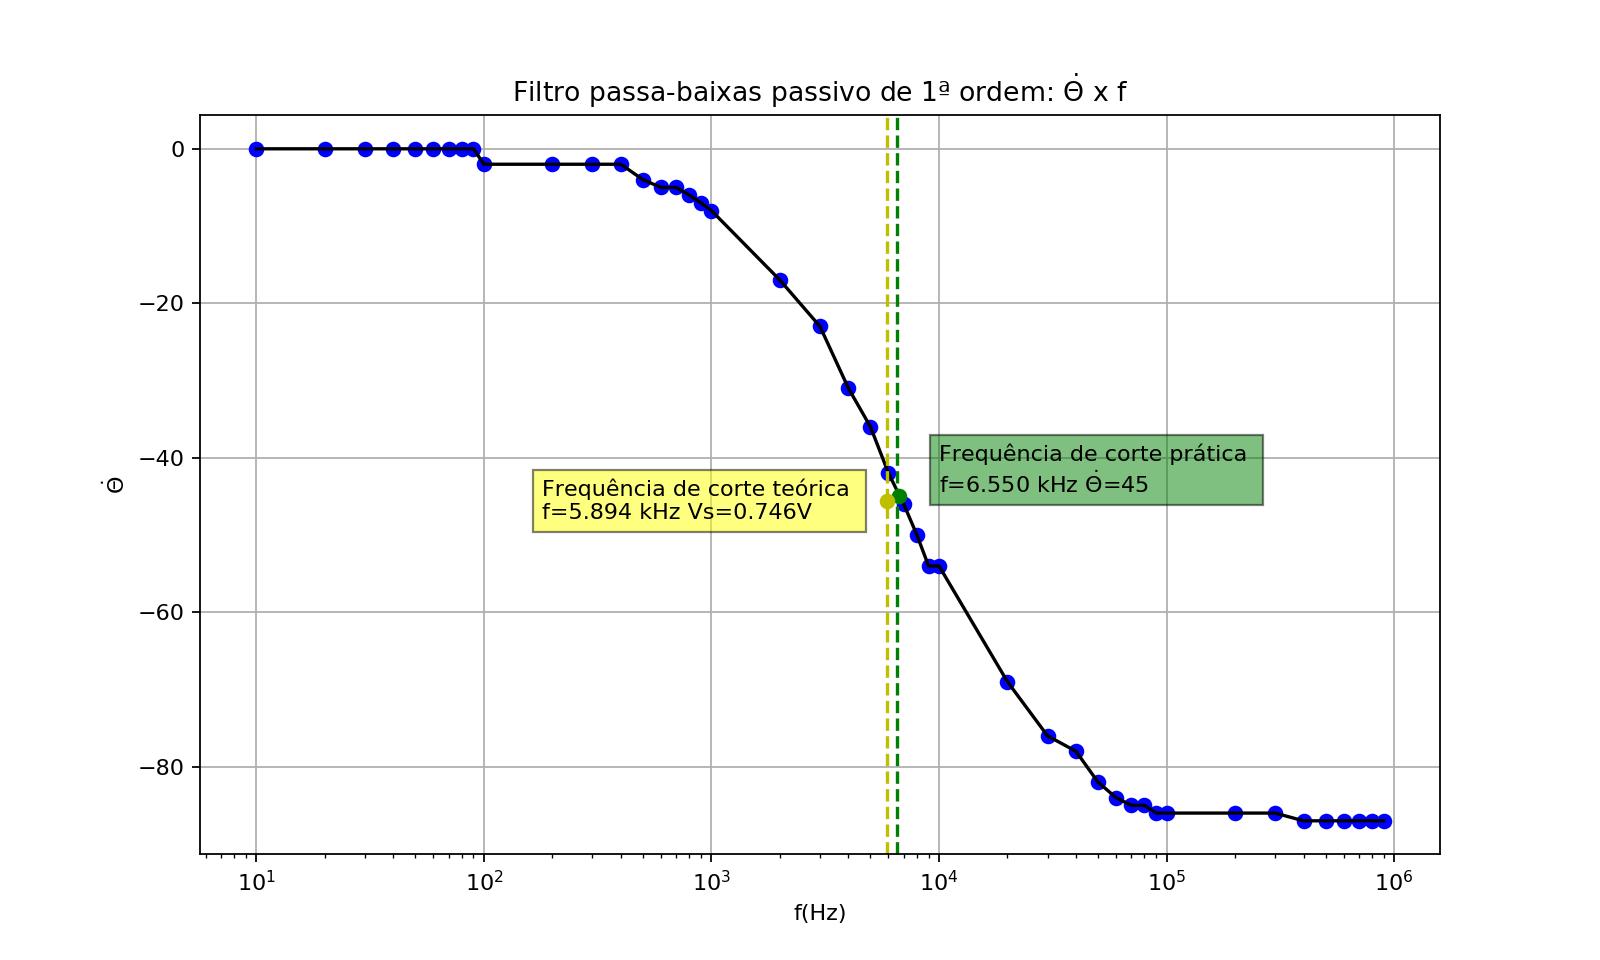

In [258]:
plt.figure(figsize=(10, 6))
plt.plot(f, teta, 'bo', f, teta, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 1ª ordem: $\dot{\Theta}$ x f")

plt.plot(6650, -45, "og")
plt.axvline(x=6550, color='g', linestyle='--')
plt.text(10000, -44.364, "Frequência de corte prática \nf=%.3f kHz $\dot{\Theta}$=45" %6.550,  bbox=dict(facecolor='green', alpha=0.5))

plt.plot(5894, -45.576, "oy")
plt.text(180, -48, "Frequência de corte teórica \nf=%.3f kHz Vs=0.746V" %5.894,  bbox=dict(facecolor='yellow', alpha=0.5))
plt.axvline(x=5894, color='y', linestyle='--')

plt.ylabel('$\dot{\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 4) A partir do gráfico da amplitude da resposta em frequência do filtro, determine as faixas de passagem, transição e atenuação.

<IPython.core.display.Javascript object>


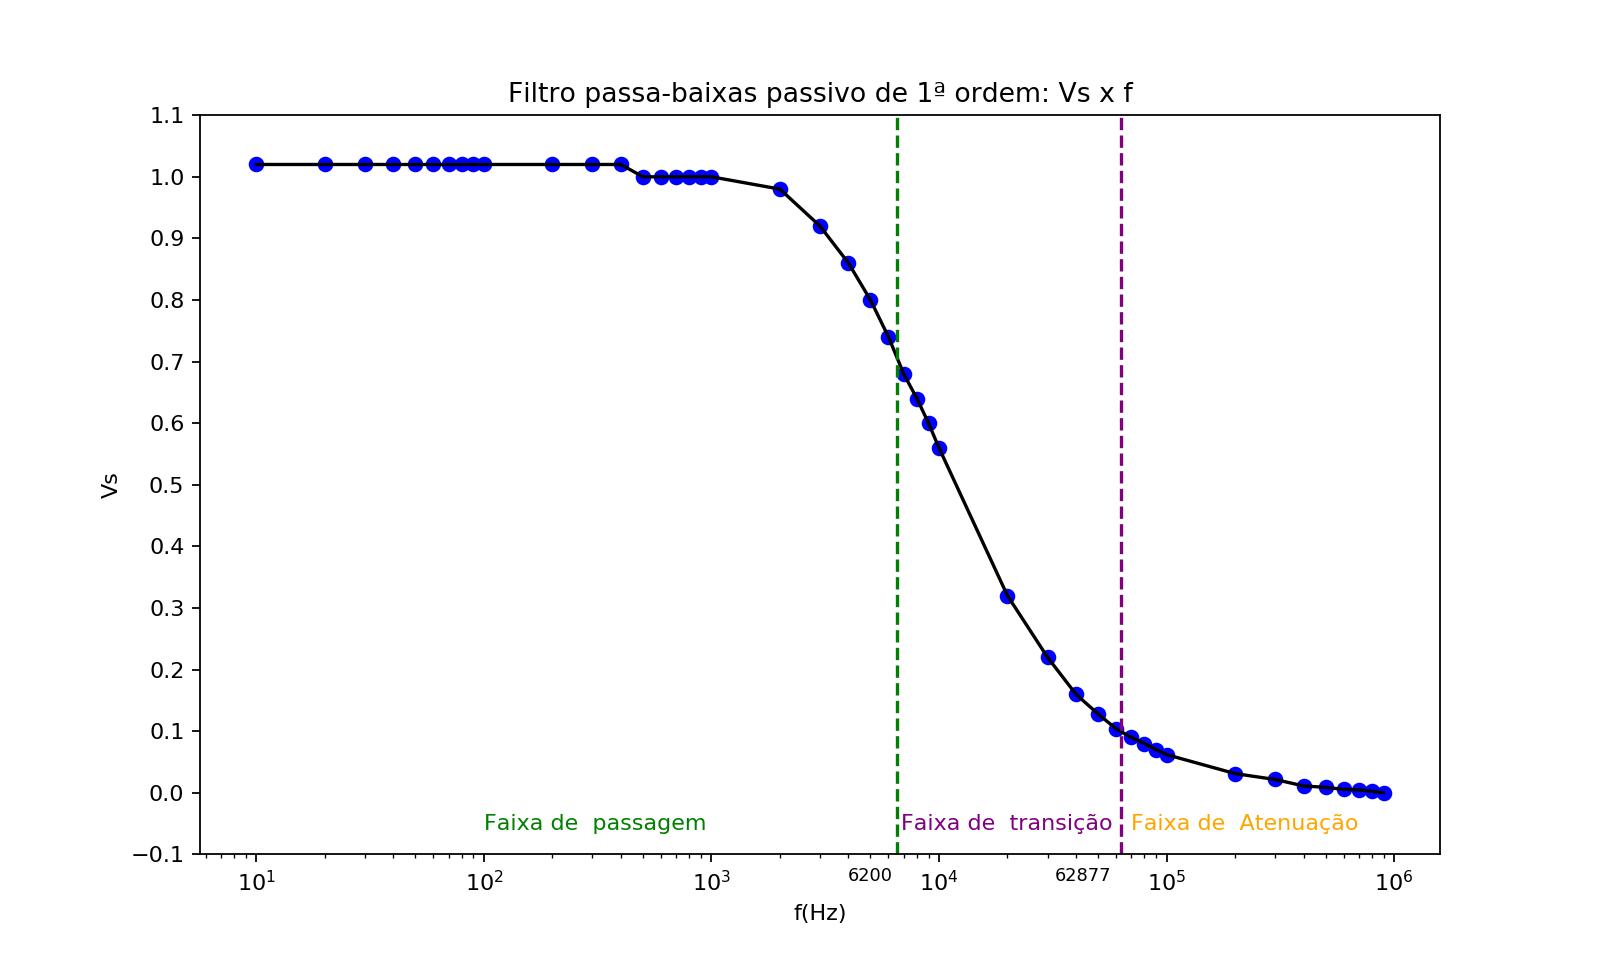

In [259]:

""" 
Ideia: pegar os dois pontos entorno do valor no eixo y e utilizar o processo de linearizaçao, 
    para com a eq da reta encontrar o a frequencia/valor correspondente no eixo x.
"""

plt.figure(figsize=(10,6))
plt.plot(f, v, 'bo', f, v, 'k')
plt.axvline(x=6550, color='g', linestyle='--')
plt.axvline(x=62877, color="purple", linestyle='--')
plt.xscale('log', nonposx='clip')
plt.title('Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.text(100, -.05, 
         'Faixa de  passagem', fontsize=10, va='center', color='g')
plt.text(6800, -.05, 
         'Faixa de  transição', fontsize=10, va='center', color="purple")
plt.text(70000, -.05, 
         'Faixa de  Atenuação', fontsize=10, va='center', color='orange')

plt.text(5000, -0.12, ('%d' % 6200), fontsize=8, va='top', ha='center')
plt.text(42877, -0.12, ('%d' % 62877), fontsize=8, va='top', ha='center')

plt.yticks(np.linspace(-0.1, 1.1, 13))
plt.show()


## 5) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico do módulo do ganho de tensão do filtro em função da frequência. 


<IPython.core.display.Javascript object>


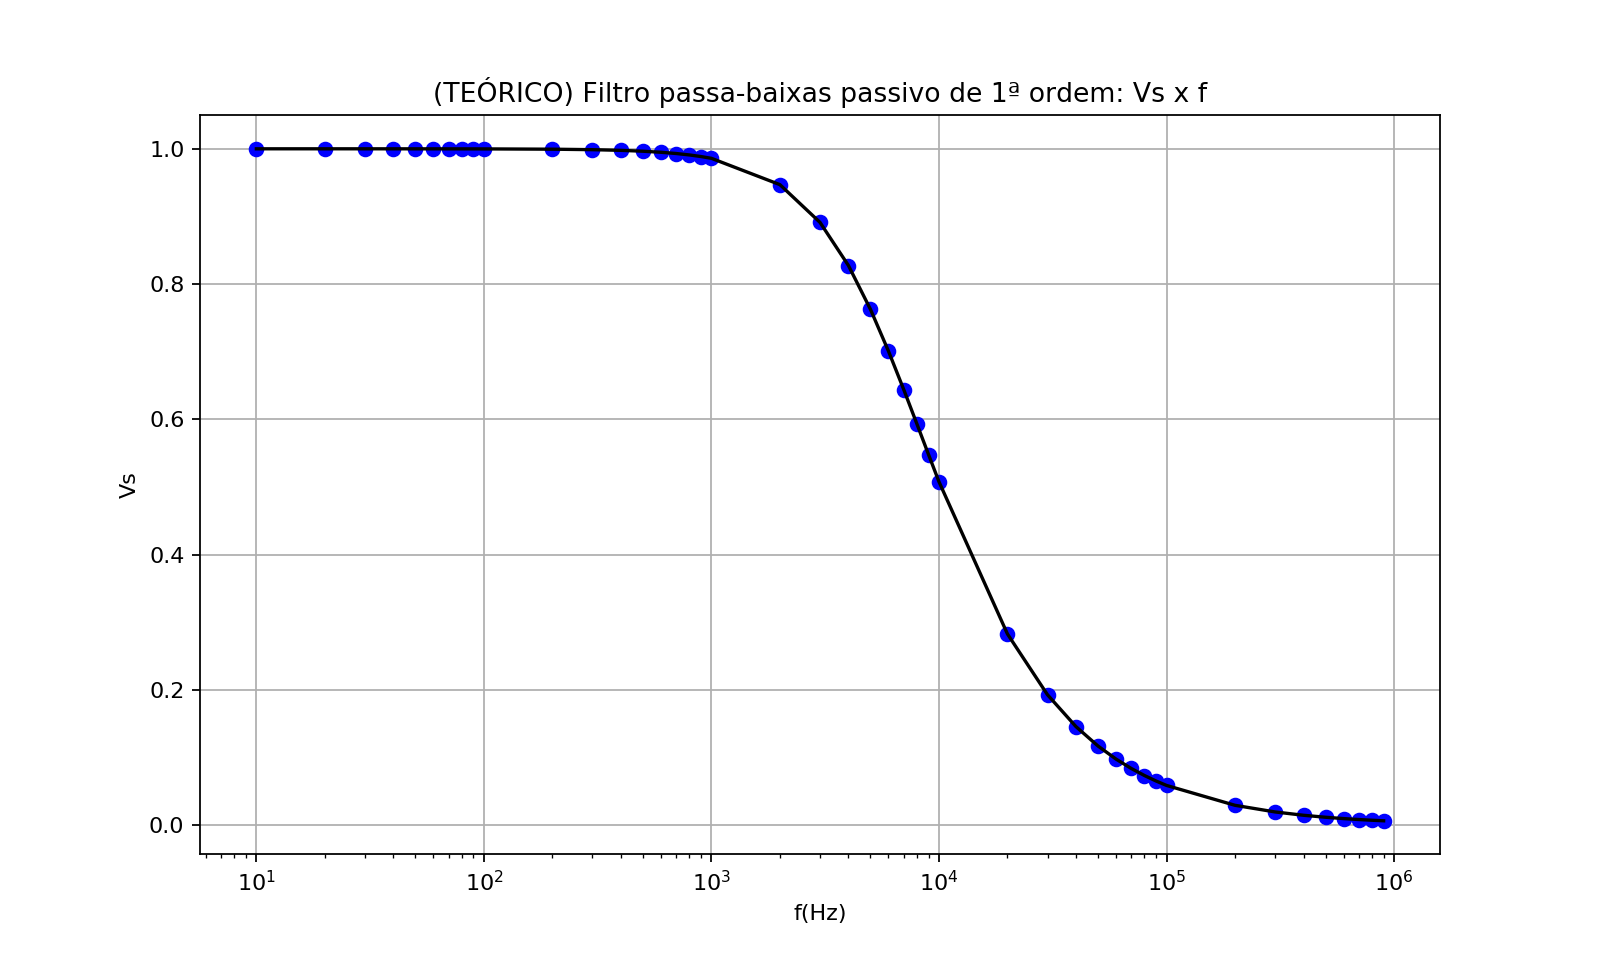

In [284]:
g = np.zeros(len(f))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * math.pi * fi * R * C)**2)

for i in range(len(f)): 
    g[i] = Av(f[i])

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, g,'bo', f, g,'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 1ª ordem: Vs x f')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()

## 6) Compare o gráfico obtido na Questão 5 com o construído na Questão 1. 


---------------------------------- 
 Erro quadrático médio = 0.000518 
----------------------------------


<IPython.core.display.Javascript object>


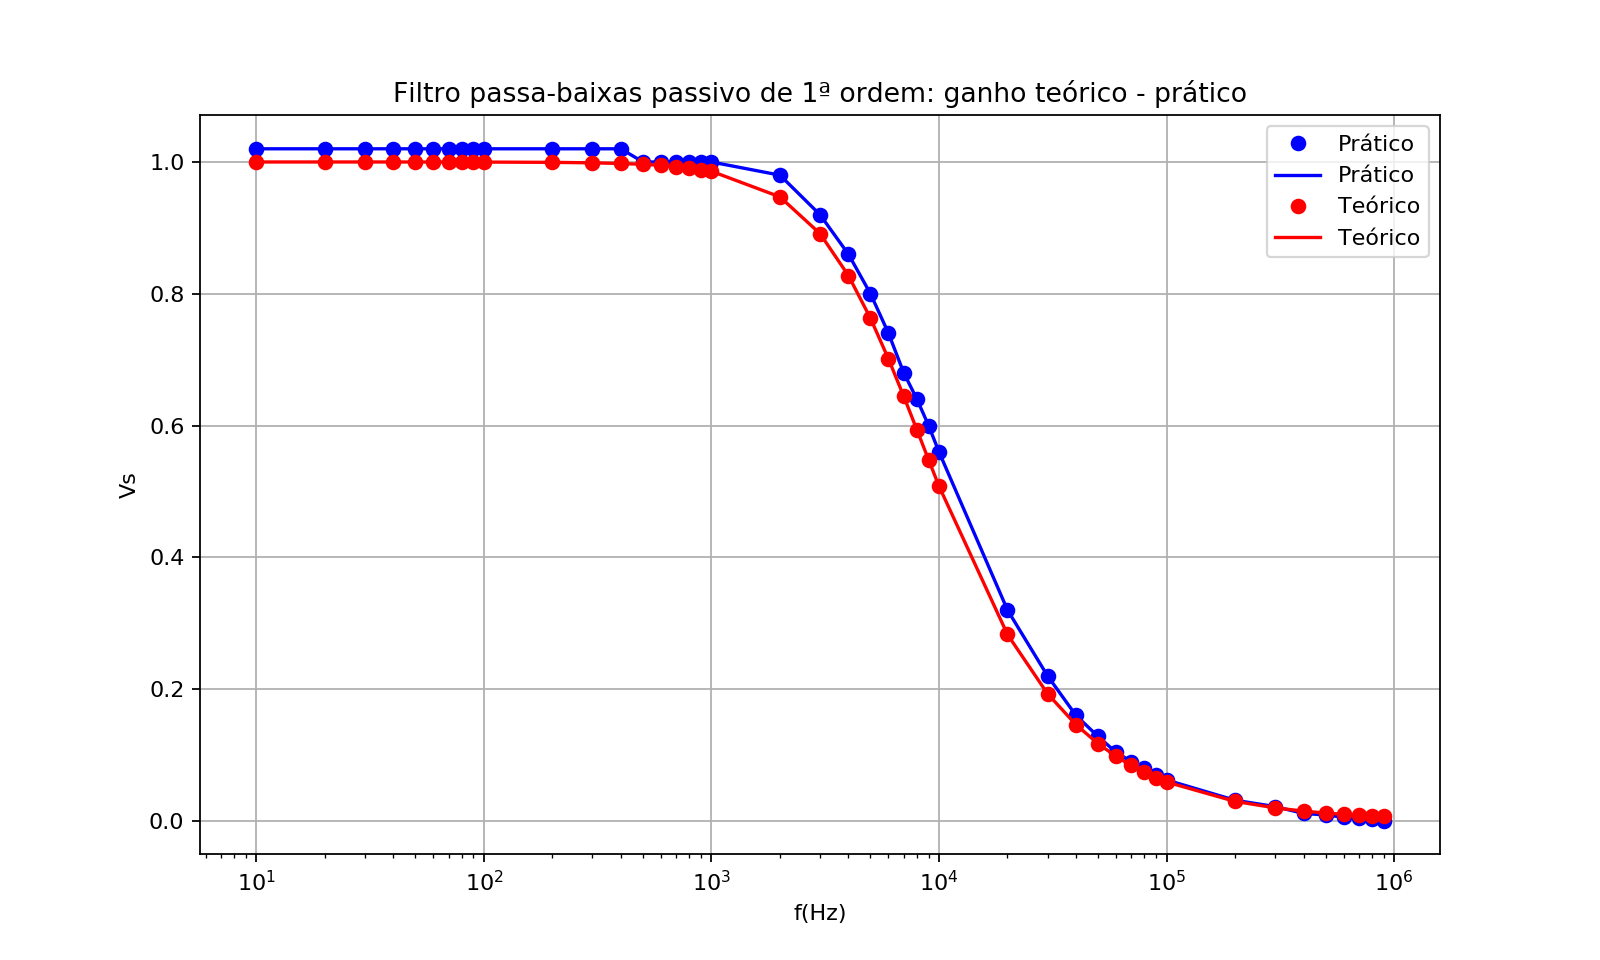

<IPython.core.display.Javascript object>


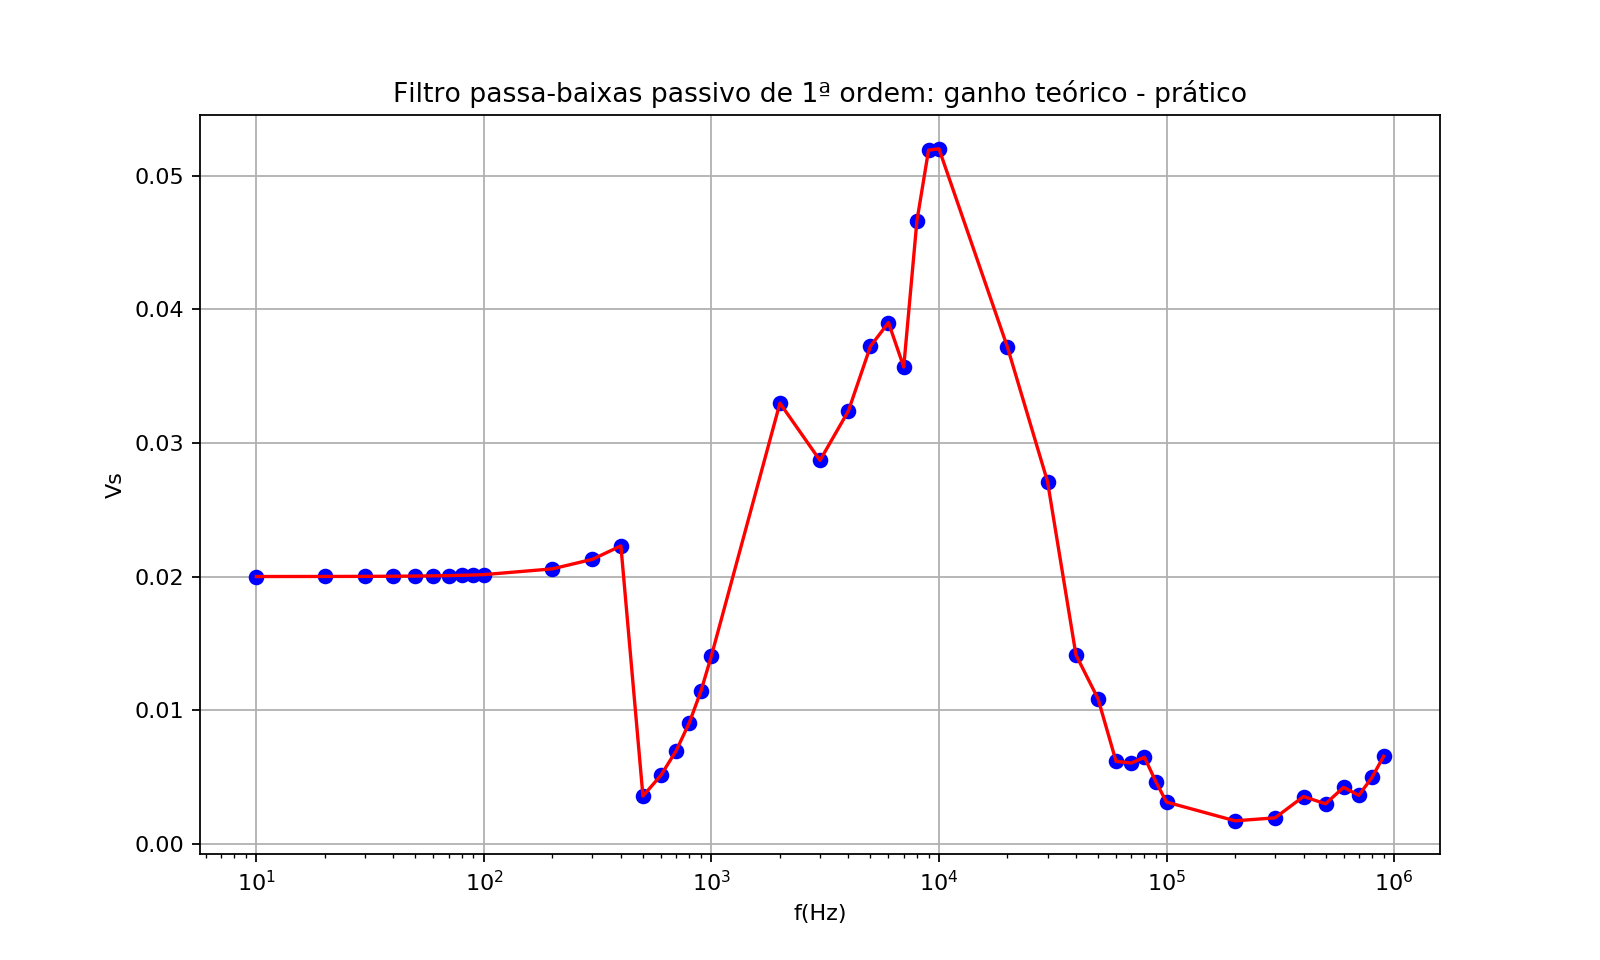

In [283]:
g = np.zeros(len(f))

def Av(fi): 
    return 1/math.sqrt(1 + (2 * 3.14 * fi * R * C)**2)

for i in range(len(f)): 
    g[i] = Av(f[i])

err = mean_squared_error(g, v)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)
diff = abs(v-g)

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, v,'bo', f, v,'b', label="Prático")
plt.plot(f, g,'ro', f, g,'r', label="Teórico")
plt.title('Filtro passa-baixas passivo de 1ª ordem: ganho teórico - prático')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'r')
plt.title('Filtro passa-baixas passivo de 1ª ordem: ganho teórico - prático')
plt.ylabel('Vs')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 7) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico da fase do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


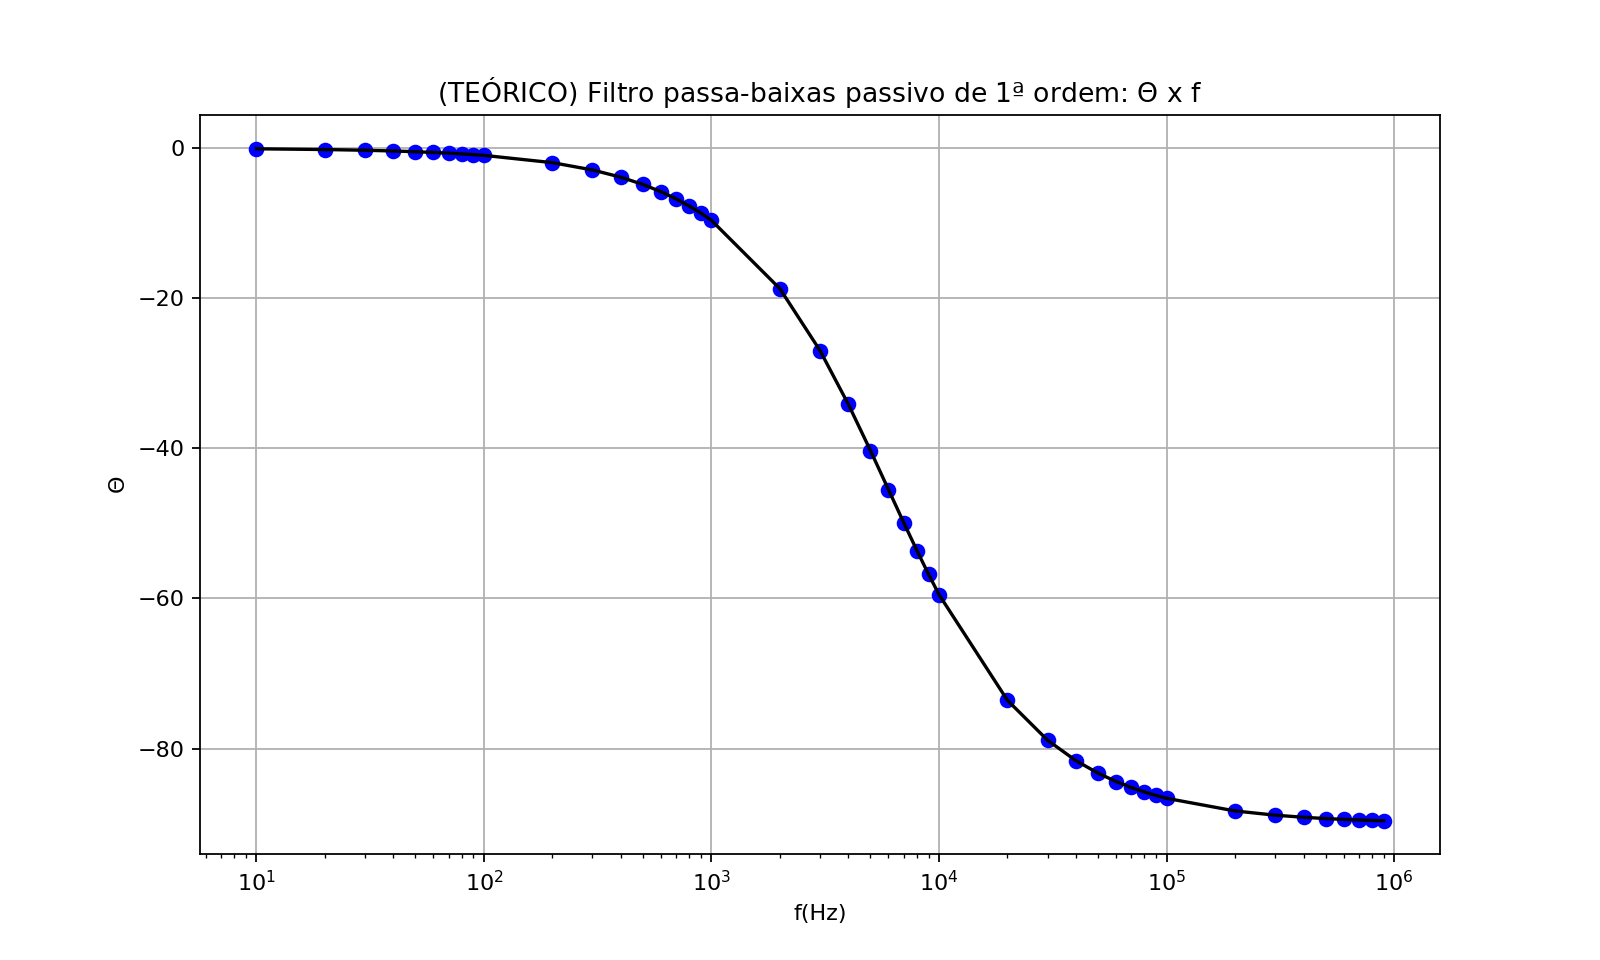

In [289]:
fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return -math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])


plt.figure(figsize=(10,6))
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 1ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f, fase_Av,'bo', f, fase_Av,'k')
plt.ylabel(r"${\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 8) Compare o gráfico obtido na Questão 7 com o construído na Questão 3. 

---------------------------------- 
 Erro quadrático médio = 5.367281 
----------------------------------


<IPython.core.display.Javascript object>


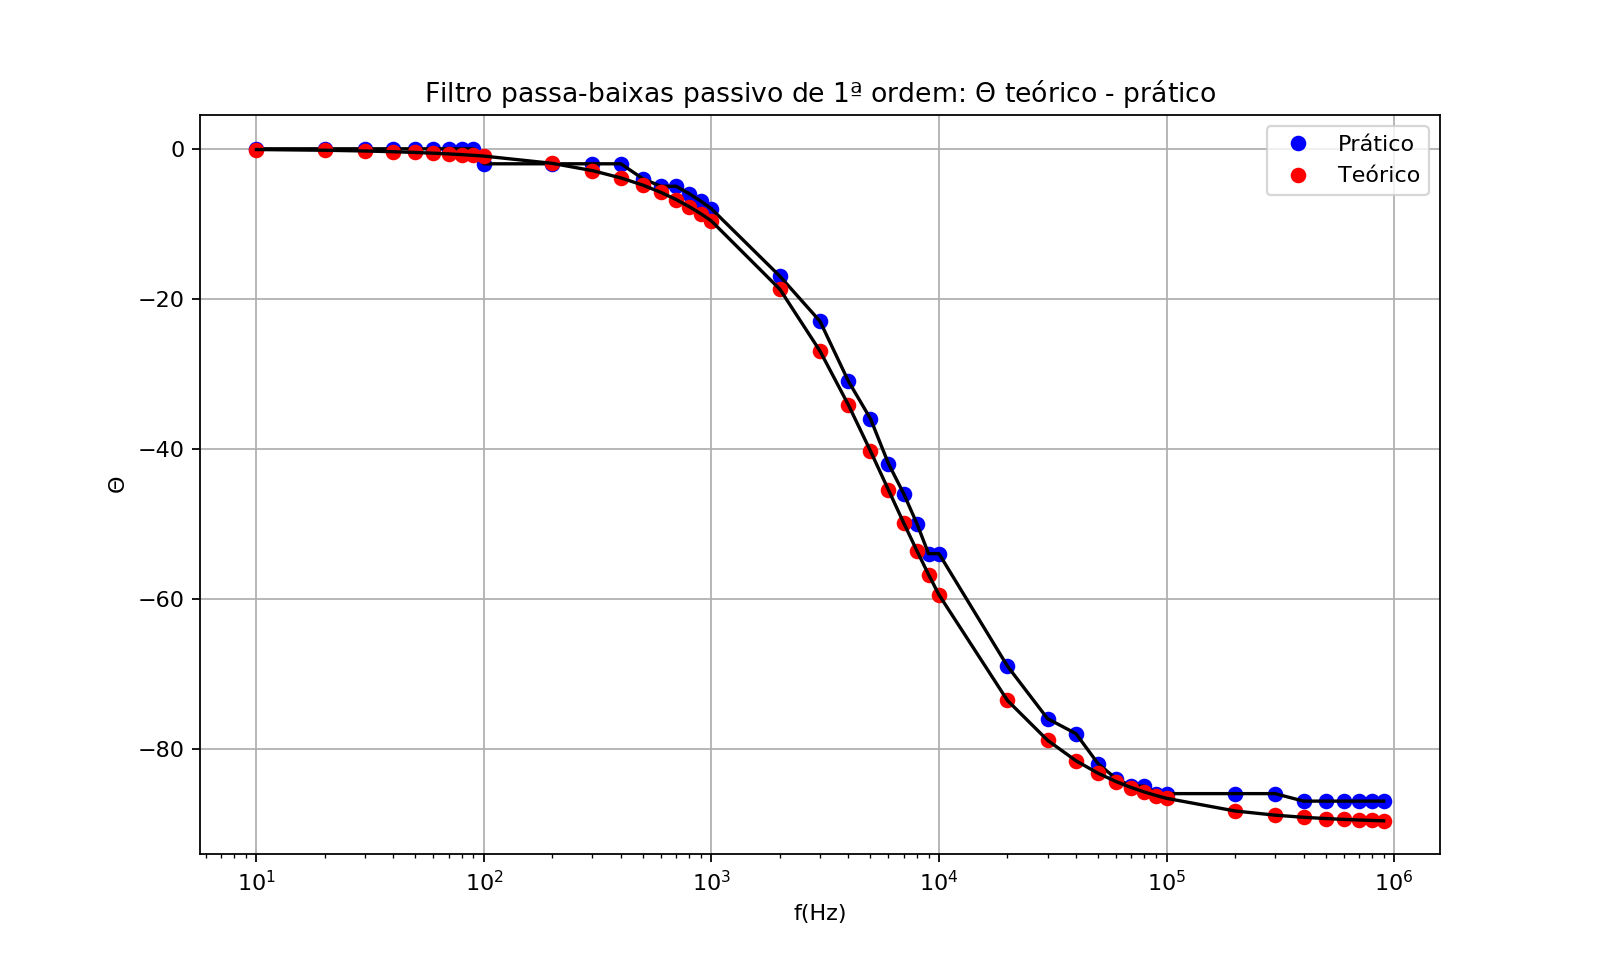

<IPython.core.display.Javascript object>


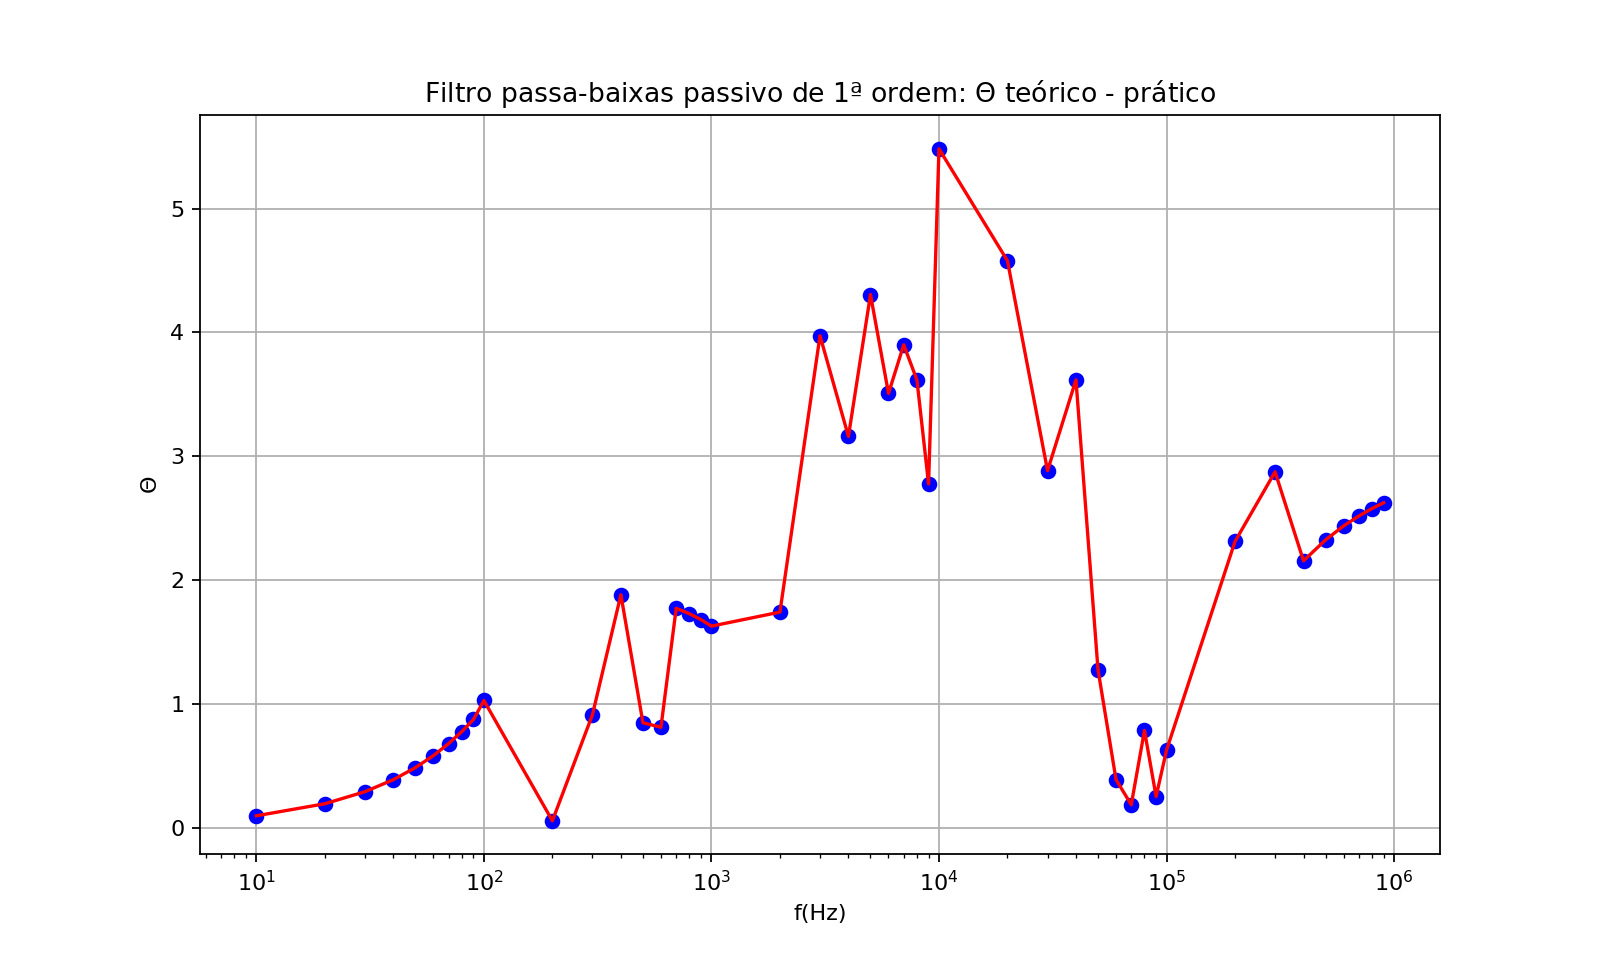

In [288]:
fase_Av = np.zeros(len(f))

def calcular_fase_Av(fi): 
    return -math.degrees(math.atan(2*np.pi*fi*R*C)) 
    
for i in range(len(f)): 
    fase_Av[i] = calcular_fase_Av(f[i])
    

err = mean_squared_error(teta, fase_Av)
print("---------------------------------- \n Erro quadrático médio = %f \n----------------------------------" %err)
diff = abs(teta-fase_Av)

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, teta,'bo',label="Prático")
plt.plot(f, teta,'k')
plt.plot(f, fase_Av,'ro',label="Teórico")
plt.plot(f, fase_Av,'k')
plt.title('Filtro passa-baixas passivo de 1ª ordem: ${\Theta}$ teórico - prático')
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f, diff,'bo', f, diff,'r')
plt.title('Filtro passa-baixas passivo de 1ª ordem: ${\Theta}$ teórico - prático')
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

# Filtro de Segunda Ordem 

In [177]:
R1 = 18e2
R2 = 18e3
C1 = 10e-9
C2 = 1e-9

In [239]:
v2 = [
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.98, 0.98, 0.98, 0.98, 0.98, 
        0.930, 0.860, 0.780, 0.720, 0.650, 0.580, 0.510, 0.488, 0.440, 0.180, 0.080, 
        0.064, 0.042, 0.040, 0.035, 0.033, 0.028, 0.025, 0.022, 0.002, 0.002, 0, 0, 0, 0, 0
    ]
f2 = [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 
         900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 
         30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 
         400000, 500000, 600000, 700000, 800000, 900000
    ]
teta2 = -1*np.array([
        0, 0,0, 0, 0, 0, 2, 2, 2, 2, 2, 4, 5, 7, 8, 10, 12, 12, 12, 25, 36, 48, 60, 
        65, 74, 78, 85, 92, 122, 140, 149, 150, 155, 164, 168, 170, 170, 172, 173, 
    ])

## 9.1) Com os valores anotados na Tabela 3, construa o gráfico do módulo do ganho de tensão do filtro em função da frequência. 

<IPython.core.display.Javascript object>


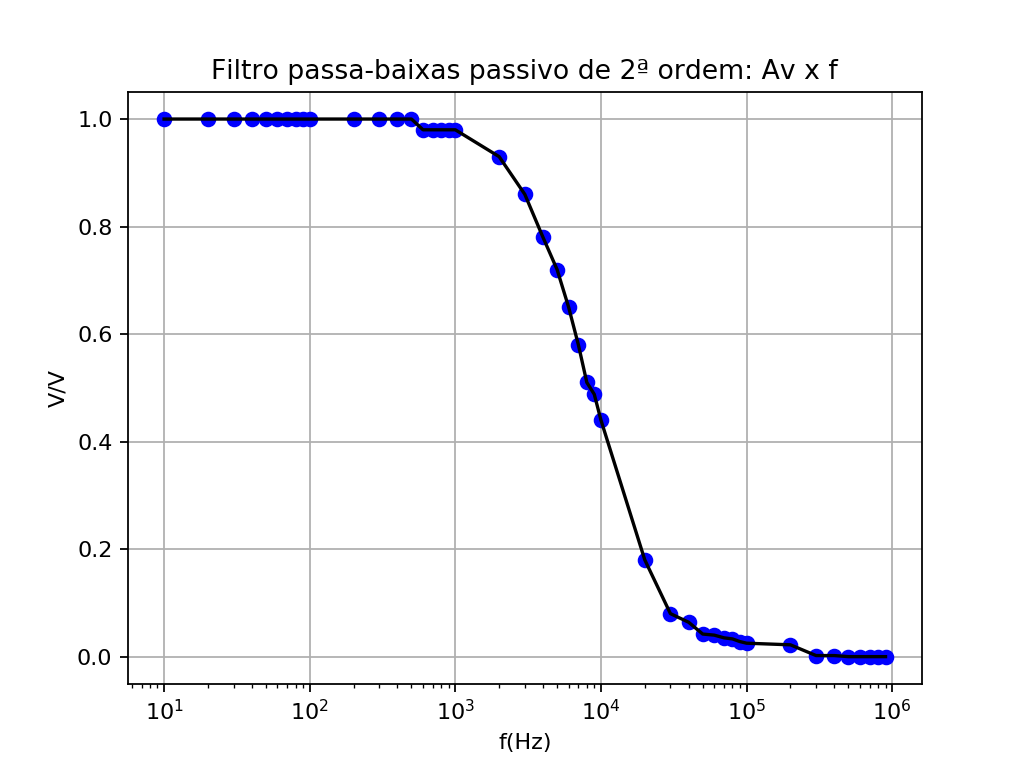

In [264]:
plt.figure()
plt.plot(f2, v2, 'bo', f2, v2, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 9.2) Com os valores anotados na Tabela 2, construa o gráfico do módulo da fase do filtro em função da frequência.

<IPython.core.display.Javascript object>


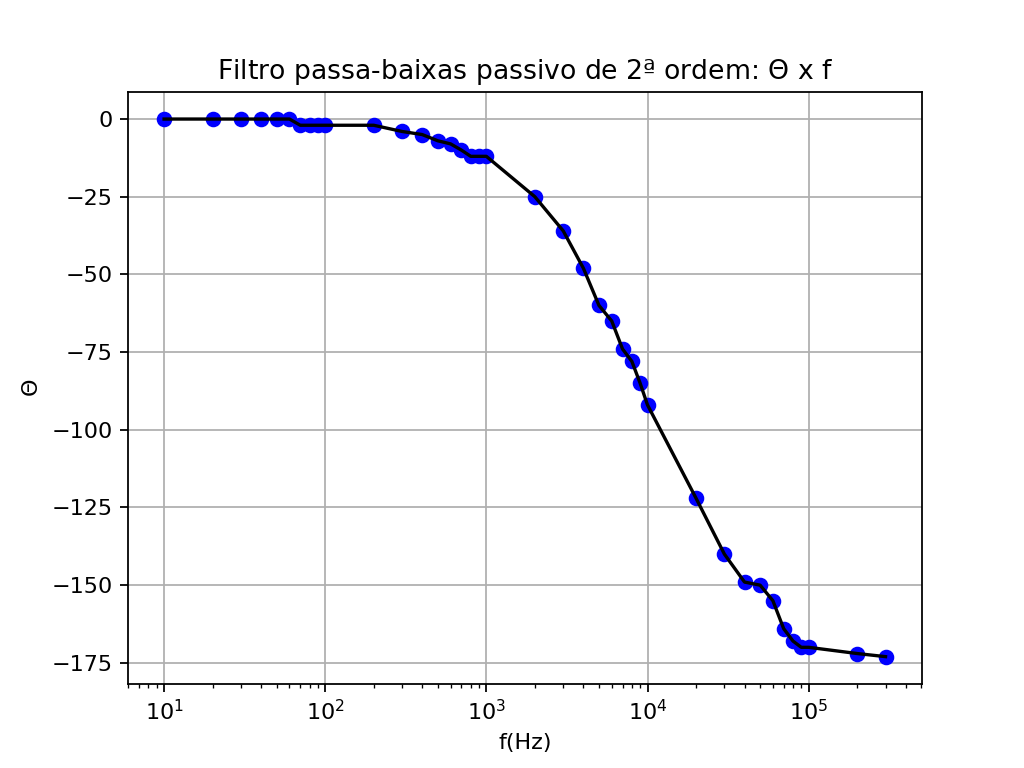

In [265]:
plt.figure()
plt.plot(f2[:-6], teta2, 'bo', f2[:-6], teta2, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 2ª ordem: ${\Theta}$ x f")
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 9.3) Calcule a frequência de corte do filtro montado na Parte Prática e indique-a nos gráficos construídos nas questões 1 e 3.

<IPython.core.display.Javascript object>


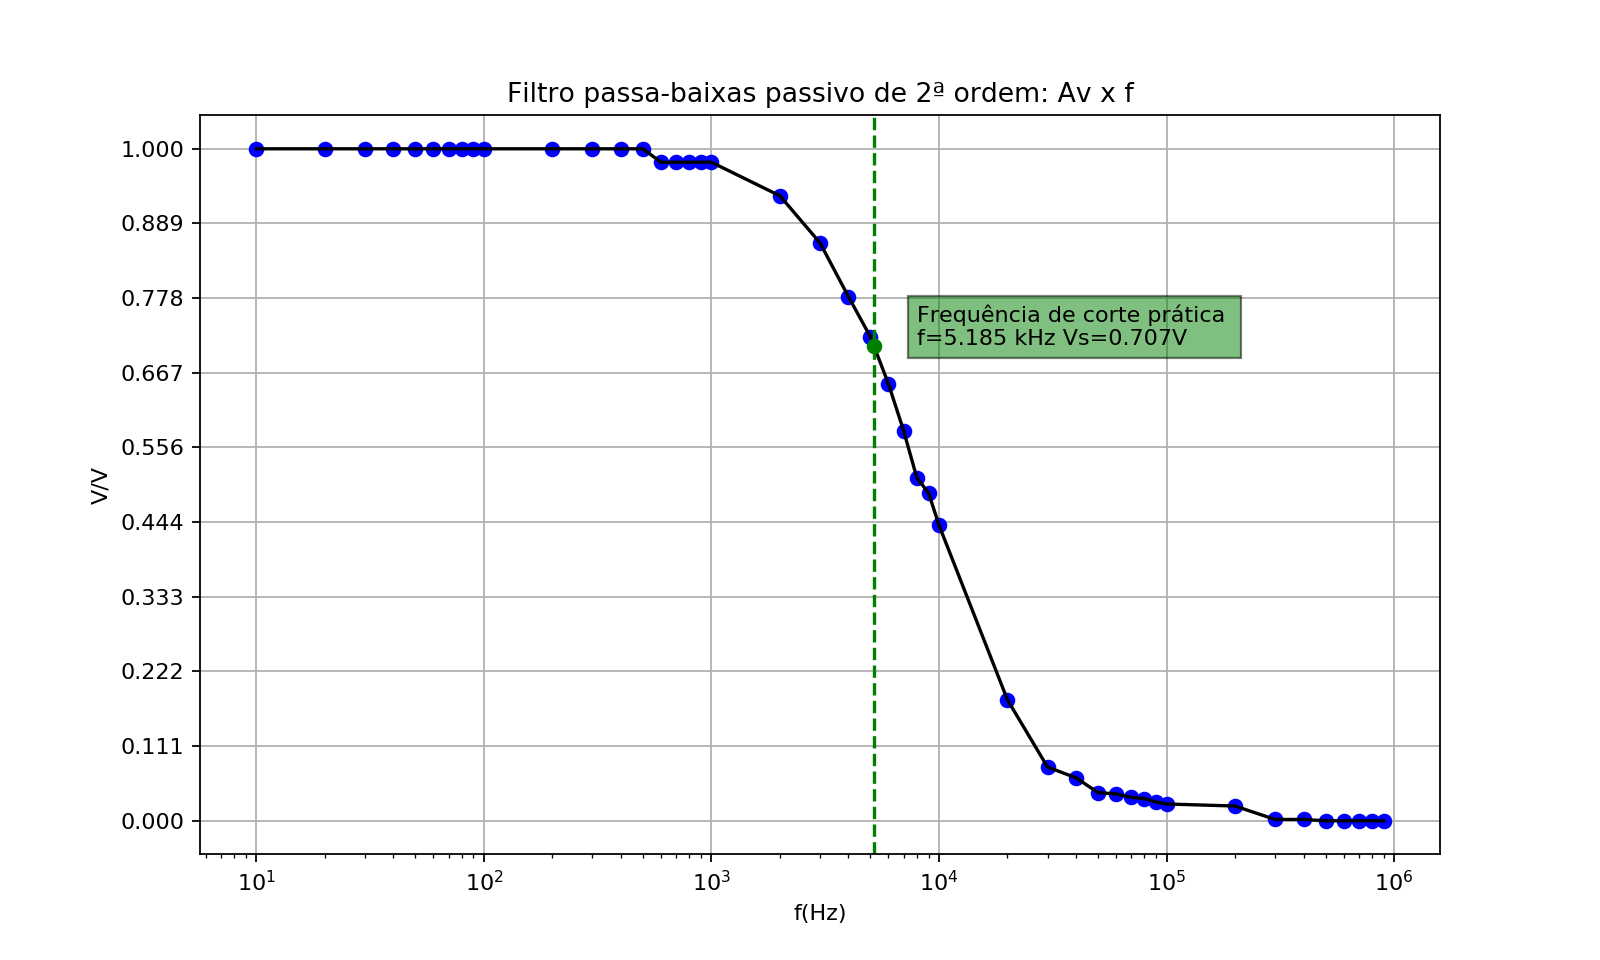

In [280]:
plt.figure(figsize=(10,6))
plt.plot(f2, v2, 'bo', f2, v2, 'k')
plt.xscale('log')
plt.title('Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.plot(5185, 0.707, "og")
plt.text(8000, 0.707, "Frequência de corte prática \nf=%.3f kHz Vs=0.707V" %5.185,  bbox=dict(facecolor='green', alpha=0.5))
plt.axvline(x=5185, color='g', linestyle='--')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.yticks(np.linspace(0, 1, 10))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


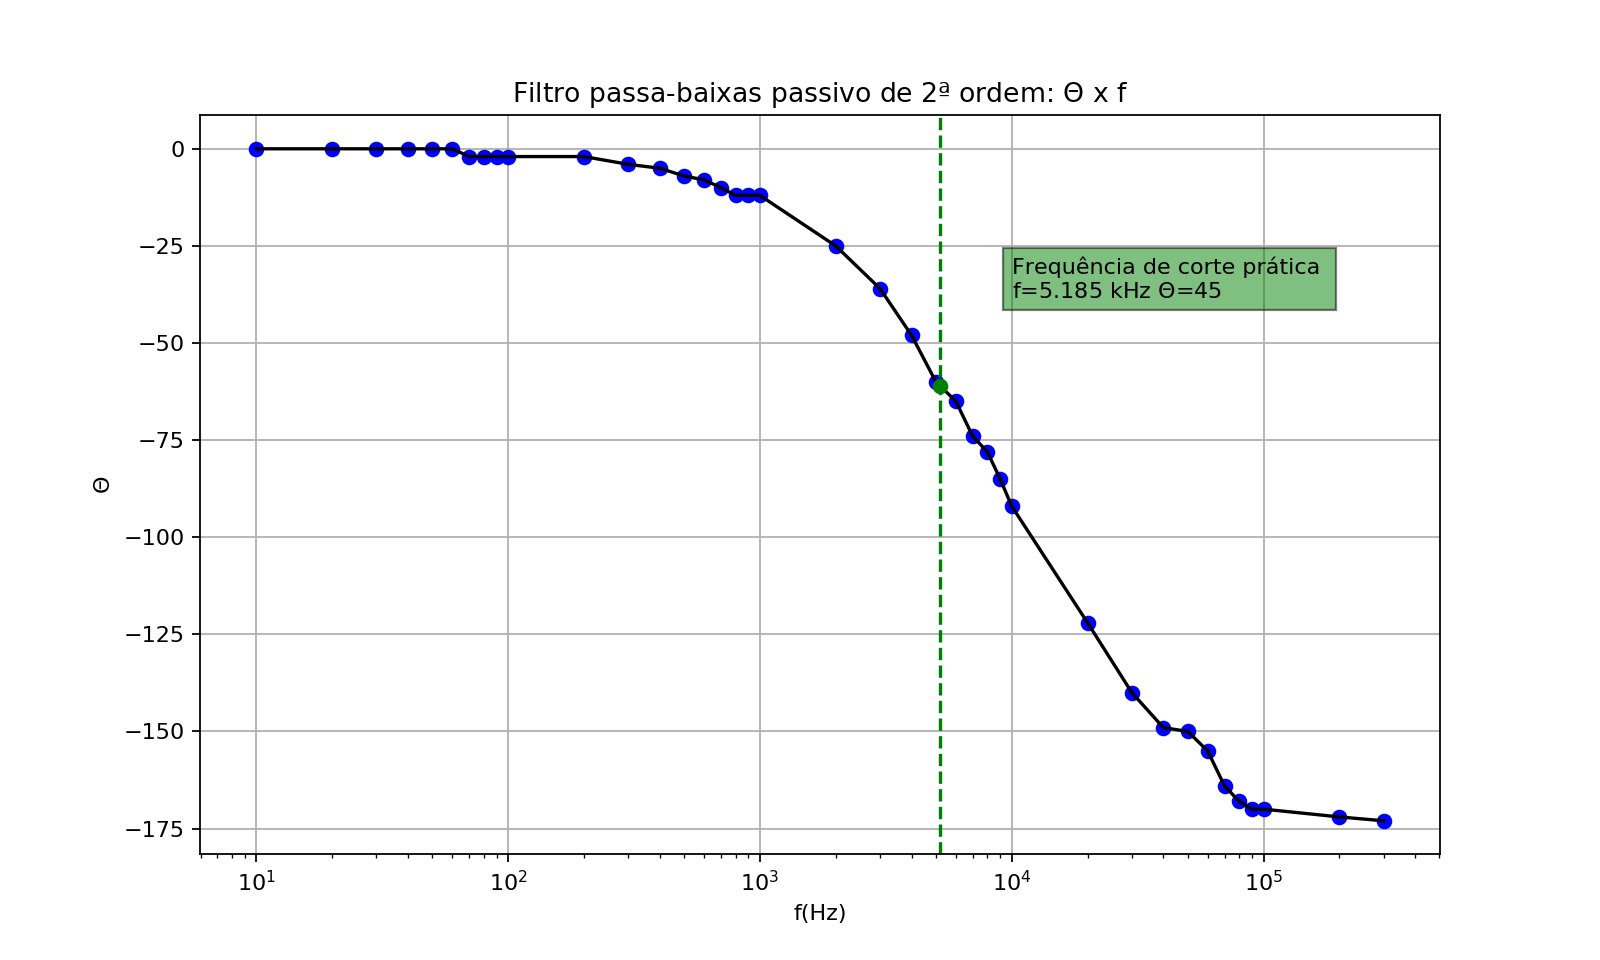

In [278]:
plt.figure(figsize=(10,6))
plt.plot(f2[:-6], teta2, 'bo', f2[:-6], teta2, 'k')
plt.xscale('log')
plt.title(r"Filtro passa-baixas passivo de 2ª ordem: ${\Theta}$ x f")
plt.plot(5185, -61, "og")
plt.axvline(x=5185, color='g', linestyle='--')
plt.text(10000, -38.364, "Frequência de corte prática \nf=%.3f kHz ${\Theta}$=45" %5.185,  bbox=dict(facecolor='green', alpha=0.5))
plt.ylabel('${\Theta}$')
plt.xlabel('f(Hz)')
plt.grid()
plt.show()


## 9.4) A partir do gráfico da amplitude da resposta em frequência do filtro, determine as faixas de passagem, transição e atenuação. 

## 9.5) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico do módulo do ganho de tensão do filtro em função da frequência.

<IPython.core.display.Javascript object>


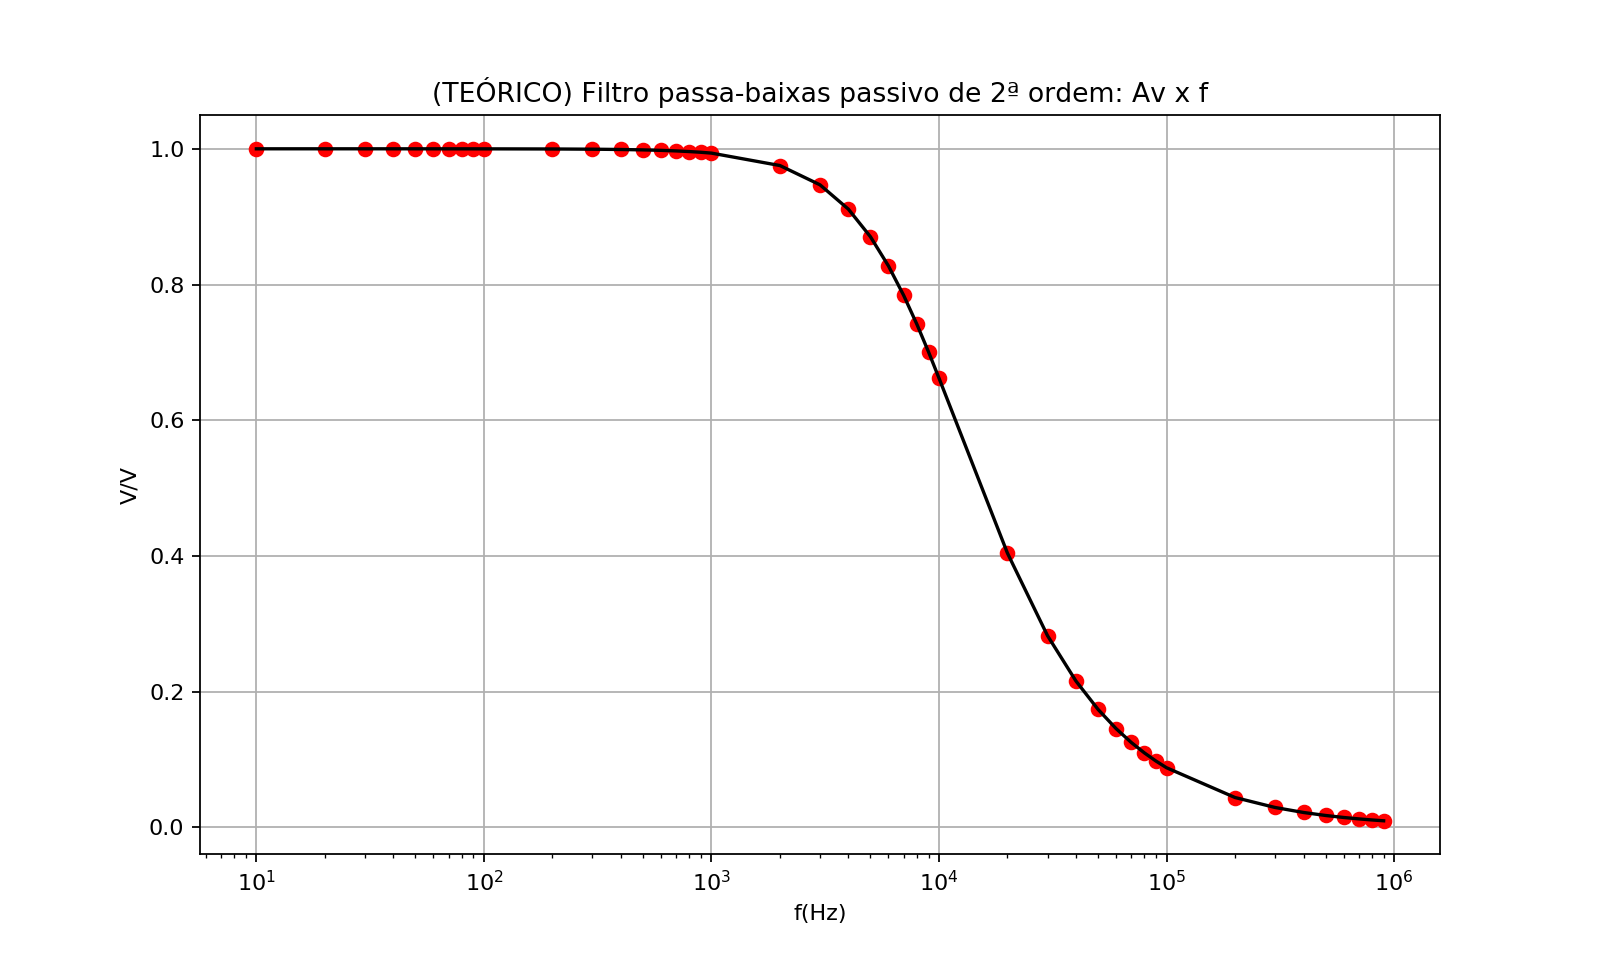

In [281]:
g2 = np.zeros(len(f))

def Av2(fi):
    s = 2*math.pi*fi*1j
    z1 = R1
    z2 = 1/(s*C1)
    z3 = R2
    z4 = 1/(s*C2)
    
    return abs((z1 + z2 - 1)*z4 / (z2 + (z1+z2)*(z3 + z4)))

for i in range(len(f)): 
    g2[i] = Av2(f2[i])

plt.figure(figsize=(10,6))
plt.xscale('log')
plt.plot(f2, g2,'ro', f2, g2,'k')
plt.title('(TEÓRICO) Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()

## 9.6) Compare o gráfico obtido na Questão 9.5 com o construído na Questão 9.1.

[0.99999936 0.99999744 0.99999424 0.99998975 0.99998399 0.99997695
 0.99996862 0.99995902 0.99994813 0.99993597 0.99974394 0.99942414
 0.99897693 0.99840283 0.99770249 0.99687672 0.99592646 0.99485276
 0.99365686 0.9753282  0.94691285 0.91100481 0.87032751 0.82730618
 0.7838518  0.74132379 0.7005976  0.6621722  0.40415085 0.28256129
 0.21572284 0.17404261 0.14571153 0.12524893 0.10979489 0.09771918
 0.08802717 0.04414207 0.02944399 0.02208718 0.0176713  0.01472678
 0.01262332 0.01104561 0.00981845]


<IPython.core.display.Javascript object>


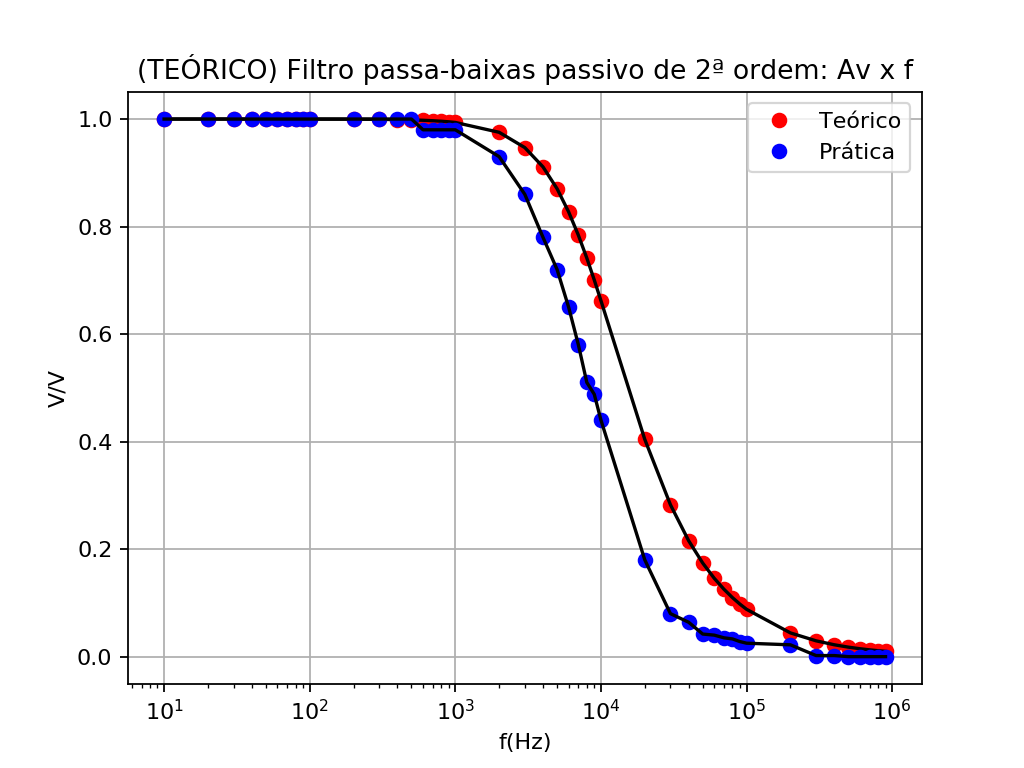

In [244]:
g2 = np.zeros(len(f))

def Av2(fi):
    s = 2*math.pi*fi*1j
    z1 = R1
    z2 = 1/(s*C1)
    z3 = R2
    z4 = 1/(s*C2)
    
    return abs((z1 + z2 - 1)*z4 / (z2 + (z1+z2)*(z3 + z4)))

for i in range(len(f)): 
    g2[i] = Av2(f2[i])

print(g2)
plt.figure()
plt.xscale('log')

plt.plot(f2, g2,'ro', label="Teórico")
plt.plot(f2, g2,'k')
plt.plot(f2, v2,'bo', label="Prática")
plt.plot(f2, v2,'k')

plt.title('(TEÓRICO) Filtro passa-baixas passivo de 2ª ordem: Av x f')
plt.legend()
plt.ylabel('V/V')
plt.xlabel('f(Hz)')
plt.plot(0,1)
plt.grid()
plt.show()

## 9.7) Usando o Matlab ou outro software matemático/científico qualquer, obtenha o gráfico da fase do ganho de tensão do filtro em função da frequência.

<IPython.core.display.Javascript object>


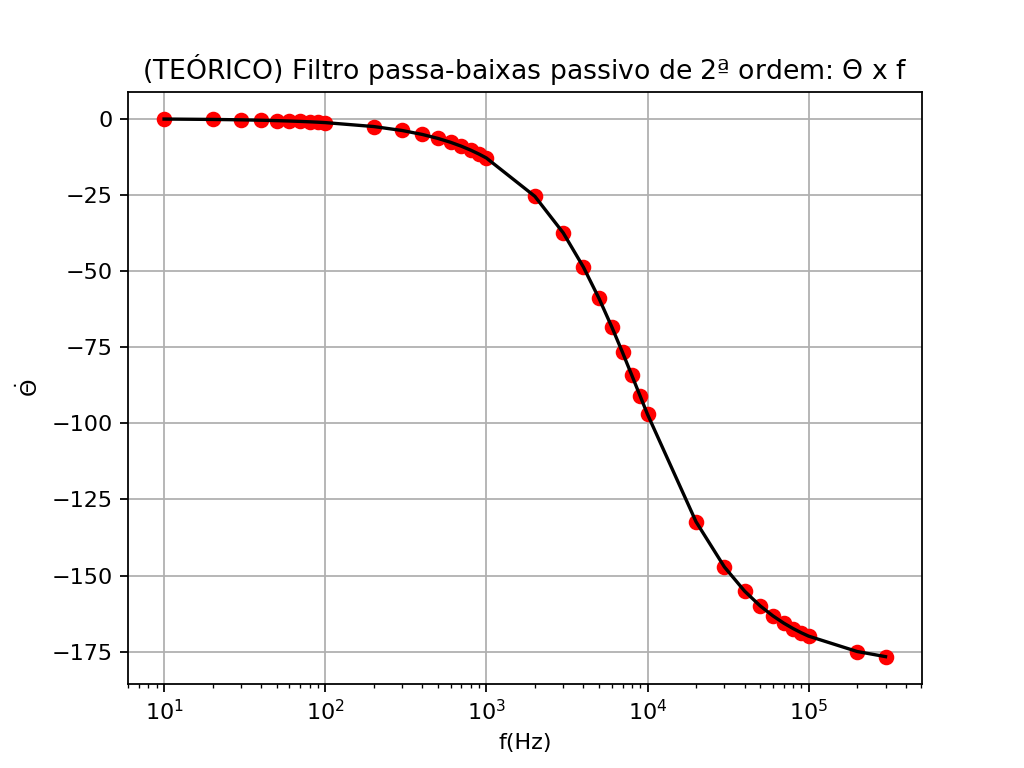

In [246]:
fase_2 = np.zeros(len(f2))

def calcular_fase_2(fi):
    s = 2*math.pi*fi*1j
    z1 = R1
    z2 = 1/(s*C1)
    z3 = R2
    z4 = 1/(s*C2)
    
    return 2*np.angle((z1 + z2 - 1)*z4 / (z2 + (z1+z2)*(z3 + z4)), deg=True)
    
for i in range(len(f2)): 
    fase_2[i] = calcular_fase_2(f2[i])


plt.figure()
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 2ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f2[:-6], fase_2[:-6],'ro', f2[:-6], fase_2[:-6], 'k')
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 9.8) Compare o gráfico obtido na Questão 9.7 com o construído na Questão 9.3.

<IPython.core.display.Javascript object>


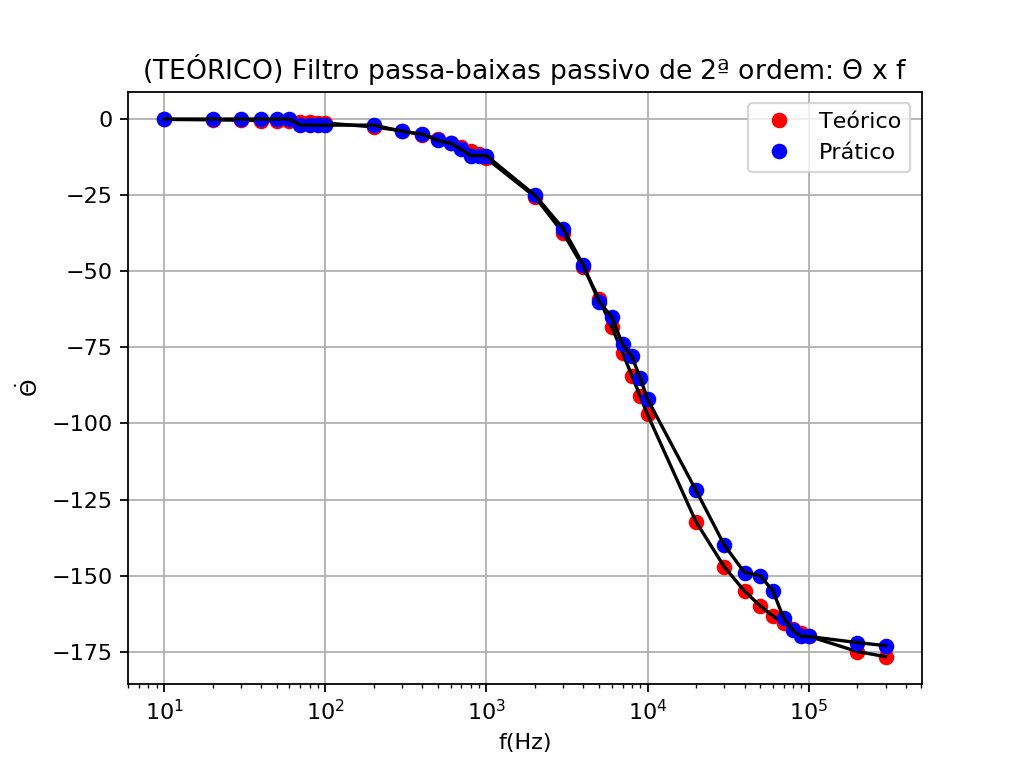

In [245]:
fase_2 = np.zeros(len(f2))

def calcular_fase_2(fi):
    s = 2*math.pi*fi*1j
    z1 = R1
    z2 = 1/(s*C1)
    z3 = R2
    z4 = 1/(s*C2)
    
    return 2*np.angle((z1 + z2 - 1)*z4 / (z2 + (z1+z2)*(z3 + z4)), deg=True)
    
for i in range(len(f2)): 
    fase_2[i] = calcular_fase_2(f2[i])


plt.figure()
plt.title(r"(TEÓRICO) Filtro passa-baixas passivo de 2ª ordem: ${\Theta}$ x f")
plt.xscale('log')
plt.plot(f2[:-6], fase_2[:-6],'ro', label="Teórico")
plt.plot(f2[:-6], fase_2[:-6], 'k')
plt.plot(f2[:-6], teta2,'bo', label="Prático")
plt.plot(f2[:-6], teta2, 'k')
plt.legend()
plt.ylabel(r"$\dot{\Theta}$")
plt.xlabel('f(Hz)')
plt.grid()
plt.show()

## 10) Compare as respostas teóricas e experimentais da amplitude do ganho de tensão dos dois filtros.